In [1]:
from Continuo import ContinuoMarkov as CM
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

In [2]:
from networkx.drawing.nx_agraph import pygraphviz_layout

In [3]:
af0 = CM.note_frequency(CM.all_alf, ('f', 0))
af2 = CM.note_frequency(CM.all_alf, ('f', 2))
af5 = CM.note_frequency(CM.all_alf, ('f', 5))
af7 = CM.note_frequency(CM.all_alf, ('f', 7))
af9 = CM.note_frequency(CM.all_alf, ('f', 9))
af10 = CM.note_frequency(CM.all_alf, ('f', 10))

an0 = CM.note_frequency(CM.all_alf, ('n', 0))
an2 = CM.note_frequency(CM.all_alf, ('n', 2))
an4 = CM.note_frequency(CM.all_alf, ('n', 4))
an5 = CM.note_frequency(CM.all_alf, ('n', 5))
an7 = CM.note_frequency(CM.all_alf, ('n', 7))
an9 = CM.note_frequency(CM.all_alf, ('n', 9))


bf0 = [af0[x] for x in range(12)]
bf2 = [af2[x] for x in range(12)]
bf5 = [af5[x] for x in range(12)]
bf7 = [af7[x] for x in range(12)]
bf9 = [af9[x] for x in range(12)]
bf10 = [af10[x] for x in range(12)]

bn0 = [an0[x] for x in range(12)]
bn2 = [an2[x] for x in range(12)]
bn4 = [an4[x] for x in range(12)]
bn5 = [an5[x] for x in range(12)]
bn7 = [an7[x] for x in range(12)]
bn9 = [an9[x] for x in range(12)] 

only_modes = [bf0, bf2, bf5, bf7, bf9, bf10, bn0, bn2, bn4, bn5, bn7, bn9]

mode_distances = []
for x in only_modes:
    distances = []
    for y in only_modes:
        distances.append(euclidean(x, y))
    mode_distances.append(distances)

A = np.array(mode_distances)

number of notes:  368
number of notes:  3536
number of notes:  14188
number of notes:  21448
number of notes:  0
number of notes:  696
number of notes:  5176
number of notes:  7736
number of notes:  560
number of notes:  612
number of notes:  16376
number of notes:  3432


In [4]:
euclidean(t_maj, t_min)

NameError: name 't_maj' is not defined

In [10]:
all_data = []
for x in [CM.all_alf[-1]]:
    for z in x.values():
        all_data.append(CM.note_frequency_song(z))
        print(z['data'])

final_notes = []
for x in all_data:
    temp_list = []
    for y in range(12):
        temp_list.append(x[y])
    final_notes.append(temp_list)

{'key': 'n', 'final': 7}
{'key': 'f', 'final': 7}
{'key': 'f', 'final': 7}
{'key': 'n', 'final': 7}
{'key': 'n', 'final': 7}
{'key': 'f', 'final': 7}
{'key': 'f', 'final': 7}
{'key': 'n', 'final': 9}
{'key': 'n', 'final': 7}
{'key': 'n', 'final': 7}
{'key': 'n', 'final': 7}
{'key': 'n', 'final': 7}
{'key': 'f', 'final': 5}
{'key': 'f', 'final': 5}
{'key': 'f', 'final': 7}
{'key': 'f', 'final': 7}


In [5]:
kmeans = KMeans(n_clusters = 2)


In [6]:
A = np.array(final_notes)

NameError: name 'final_notes' is not defined

In [7]:
kmeans.fit(A)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

coordinate: [ 23.61111111   0.          13.88888889   0.          11.11111111
   2.77777778   4.16666667  30.55555556   0.           4.16666667   0.
   9.72222222] label: 1
coordinate: [ 18.25396825   0.          11.11111111   8.73015873   3.96825397
  13.49206349   0.3968254   19.84126984   1.98412698   7.53968254
  13.0952381    1.58730159] label: 0
coordinate: [ 25.42372881   1.69491525   7.62711864   3.38983051  11.01694915
  14.40677966   0.          16.10169492   5.93220339   3.81355932
   8.89830508   1.69491525] label: 0
coordinate: [ 16.46341463   0.          18.90243902   0.          10.97560976
  10.97560976   3.04878049  17.68292683   0.          15.24390244
   0.6097561    6.09756098] label: 1
coordinate: [ 20.83333333   0.          14.0625       0.          13.02083333   9.375
   1.04166667  25.           0.           7.8125       1.04166667   7.8125    ] label: 1
coordinate: [ 15.0990099    0.          11.88118812  10.64356436   2.72277228
  12.12871287   0.99009901  20.

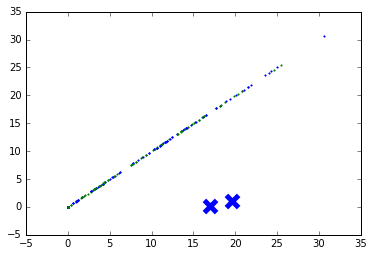

In [7]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# print(centroids)
# print(labels)

colors = ["g.", "b."]

for x in range(len(A)):
    print('coordinate:', A[x], 'label:', labels[x])
    plt.plot(A[x], A[x], colors[labels[x]], markersize = 3)

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s=150, linewidths=5, zorder=10)
plt.show()


In [8]:
def mds_graph(data_matrix):
    dt = [('len', float)]
    A = data_matrix.view(dt)
    G = nx.from_numpy_matrix(A)
#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A', 
#                              12: 'alf_maj', 13: 'alf_min', 14: 'all_alf', 15: 'Temp_maj', 16: 'Temp_min'}) 


#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A', 
#                              12: 'Temp_maj', 13: 'Temp_min'})

#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A'})

    G = to_agraph(G)

    G.node_attr.update(color='green', style='filled')
    G.edge_attr.update(color='black', style='invis', width=0)
    G.draw('/home/daniel/Desktop/neato_modes_montesardo.png', format='png', prog='neato')
    print(G.layout())

In [11]:
key_distances = []
for x in final_notes:
    distances = []
    for y in final_notes:
        distances.append(euclidean(x, y))
    key_distances.append(distances)

In [12]:
mds_graph(np.array(key_distances))

None


In [11]:
labels = []
labels.append('Temperley MAJOR')
labels.append('Temperley MINOR')
all_notes = []
for x in CM.all_alf:
    for z in x.values():
        all_notes.append(CM.note_frequency_song(z))
        label = (z['data']['key'], z['data']['final'])
        labels.append(label)

temp_maj = {0: 0.184, 1: 0.001, 2: 0.155, 3: 0.003, 4: 0.191, 
            5: 0.109, 6: 0.005, 7: 0.214, 8: 0.001, 9: 0.078, 
            10: 0.004, 11: 0.055}

temp_min = {0: 0.192, 1: 0.005, 2: 0.149, 3: 0.179, 4: 0.002, 
              5: 0.144, 6: 0.002, 7: 0.201, 8: 0.038, 9: 0.012, 
              10: 0.053, 11: 0.022}

In [12]:
t_maj = [temp_maj[x]* 100 for x in range(12)]
t_min = [temp_min[x]* 100 for x in range(12)]


final_notes = []
final_notes.append(t_maj)
final_notes.append(t_min)

for x in all_notes:
    temp_list = []
    for y in range(12):
        temp_list.append(x[y])
    final_notes.append(temp_list)


    
key_distances = []
for x in final_notes:
    distances = []
    for y in final_notes:
        distances.append(euclidean(x, y))
    key_distances.append(distances)

In [20]:
def mds_graph(data_matrix):
    dt = [('len', float)]
    A = data_matrix.view(dt)
    G = nx.from_numpy_matrix(A)
#     print("this is G", G)
#     G = to_agraph(G)

#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A', 
#                              12: 'alf_maj', 13: 'alf_min', 14: 'all_alf', 15: 'Temp_maj', 16: 'Temp_min'}) 


#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A', 
#                              12: 'Temp_maj', 13: 'Temp_min'})

#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A'})
    new_labels = {}
#     print(all_labels)
    for x in range(len(labels)):
        new_labels[x] = str((x, labels[x]))
#     print(new_labels)
    G = nx.relabel_nodes(G, new_labels)
#     print(G)
    G = to_agraph(G)

    G.node_attr.update(color='green', style='filled')
    
    for x in new_labels.values():
        if "('f', 0)" in x:
            G.get_node(x).attr['color'] = 'pink'
            G.get_node(x).attr['shape'] = 'square'
        elif "('f', 9)" in x:
            G.get_node(x).attr['color'] = 'purple'
            G.get_node(x).attr['shape'] = 'triangle'
        elif "('n', 2)" in x:
            G.get_node(x).attr['color'] = 'purple'
            G.get_node(x).attr['shape'] = 'circle'
        elif "('f', 7)" in x:
            G.get_node(x).attr['color'] = 'purple'
            G.get_node(x).attr['shape'] = 'square'
        elif "('n', 9)" in x:
            G.get_node(x).attr['color'] = 'blue'
            G.get_node(x).attr['shape'] = 'triangle'
        elif "('n', 4)" in x:
            G.get_node(x).attr['color'] = 'blue'
            G.get_node(x).attr['shape'] = 'circle'
        elif "('f', 2)" in x:
            G.get_node(x).attr['color'] = 'blue'
            G.get_node(x).attr['shape'] = 'square'
        elif "('f', 10)" in x:
            G.get_node(x).attr['color'] = 'red'
            G.get_node(x).attr['shape'] = 'square'
        elif "('n', 5)" in x:
            G.get_node(x).attr['color'] = 'red'
            G.get_node(x).attr['shape'] = 'circle'
        elif "('n', 0)" in x:
            G.get_node(x).attr['color'] = 'red'
            G.get_node(x).attr['shape'] = 'triangle'
        elif "('f', 5)" in x:
            G.get_node(x).attr['color'] = 'orange'
            G.get_node(x).attr['shape'] = 'square'
        elif "('n', 7)" in x:
            G.get_node(x).attr['color'] = 'orange'
            G.get_node(x).attr['shape'] = 'triangle'
            
    major = G.get_node("(0, 'Temperley MAJOR')")
    major.attr['color']='red'
    major.attr['shape']='star'
    minor = G.get_node("(1, 'Temperley MINOR')")
    minor.attr['color']=''
    G.edge_attr.update(color='black', style='invis', width=0)
    G.draw('/home/daniel/Desktop/kaps/all_alf.png', format='png', prog='neato')
#     print(G.layout())
    return G

In [21]:
G = mds_graph(np.array(key_distances))

()


In [31]:
G.draw('/home/daniel/Desktop/test.dot', format='dot', prog='neato')

In [36]:
A = G.layout(prog='neato')

In [54]:
pos = pygraphviz_layout(G, prog = 'neato', root=None)

AttributeError: 'AGraph' object has no attribute 'number_of_selfloops'

In [45]:
 nx.pygraphviz_layout

AttributeError: module 'networkx' has no attribute 'pygraphviz_layout'

In [ ]:
alls = []
for x in CM.all_kaps:
    for y in x:
        alls.append(y)

In [ ]:
len(alls)

In [ ]:
for x in CM.all_milanuzzi:
    for y in x:
        alls.append(y)

In [ ]:
for x in CM.obizzi.libro_primo_continuo:
    alls.append(x)

In [ ]:
len(alls)

In [ ]:
for x in [CM.giaccio.Giaccio_1618a, CM.giaccio.Giaccio_1618b]:
    for y in x:
        alls.append(y)

In [ ]:
len(alls)

In [ ]:
for x in [CM.stefani.Stefani_1621]:
    for y in x:
        alls.append(y)

In [ ]:
len(alls)

In [72]:
dt = [('len', float)]
A = np.array(key_distances).view(dt)
G = nx.from_numpy_matrix(A)
#     print("this is G", G)
#     G = to_agraph(G)

#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A', 
#                              12: 'alf_maj', 13: 'alf_min', 14: 'all_alf', 15: 'Temp_maj', 16: 'Temp_min'}) 


#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A', 
#                              12: 'Temp_maj', 13: 'Temp_min'})

#     G = nx.relabel_nodes(G, {0: '♭: C', 1: '♭: D', 2: '♭: F', 3: '♭: G', 4: '♭: A', 5: '♭: B♭', 
#                              6: '♮: C', 7: '♮: D', 8: '♮: E', 9: '♮: F', 10: '♮: G', 11: '♮: A'})
new_labels = {}
#     print(all_labels)
for x in range(len(labels)):
    new_labels[x] = str((x, labels[x]))
#     print(new_labels)
G = nx.relabel_nodes(G, new_labels)
print(G)
G = to_agraph(G)

G.node_attr.update(color='green', style='filled')

for x in new_labels.values():
    if "('f', 0)" in x:
        G.get_node(x).attr['color'] = 'pink'
        G.get_node(x).attr['shape'] = 'square'
    elif "('f', 9)" in x:
        G.get_node(x).attr['color'] = 'purple'
        G.get_node(x).attr['shape'] = 'triangle'
    elif "('n', 2)" in x:
        G.get_node(x).attr['color'] = 'purple'
        G.get_node(x).attr['shape'] = 'circle'
    elif "('f', 7)" in x:
        G.get_node(x).attr['color'] = 'purple'
        G.get_node(x).attr['shape'] = 'square'
    elif "('n', 9)" in x:
        G.get_node(x).attr['color'] = 'blue'
        G.get_node(x).attr['shape'] = 'triangle'
    elif "('n', 4)" in x:
        G.get_node(x).attr['color'] = 'blue'
        G.get_node(x).attr['shape'] = 'circle'
    elif "('f', 2)" in x:
        G.get_node(x).attr['color'] = 'blue'
        G.get_node(x).attr['shape'] = 'square'
    elif "('f', 10)" in x:
        G.get_node(x).attr['color'] = 'red'
        G.get_node(x).attr['shape'] = 'square'
    elif "('n', 5)" in x:
        G.get_node(x).attr['color'] = 'red'
        G.get_node(x).attr['shape'] = 'circle'
    elif "('n', 0)" in x:
        G.get_node(x).attr['color'] = 'red'
        G.get_node(x).attr['shape'] = 'triangle'
    elif "('f', 5)" in x:
        G.get_node(x).attr['color'] = 'orange'
        G.get_node(x).attr['shape'] = 'square'
    elif "('n', 7)" in x:
        G.get_node(x).attr['color'] = 'orange'
        G.get_node(x).attr['shape'] = 'triangle'

major = G.get_node("(0, 'Temperley MAJOR')")
major.attr['color']='red'
major.attr['shape']='star'
minor = G.get_node("(1, 'Temperley MINOR')")
minor.attr['color']='blue'
minor.attr['shape']='star'
G.edge_attr.update(color='black', style='invis', width=0)
G.draw('/home/daniel/Desktop/kaps/all_alf_with_dupes.png', format='png', prog='neato')


()


SyntaxError: 'return' outside function (<ipython-input-72-5cae8254e857>, line 75)

In [66]:
new_labels

{0: "(0, 'Temperley MAJOR')",
 1: "(1, 'Temperley MINOR')",
 2: "(2, ('f', 7))",
 3: "(3, ('f', 7))",
 4: "(4, ('n', 7))",
 5: "(5, ('f', 7))",
 6: "(6, ('n', 7))",
 7: "(7, ('f', 7))",
 8: "(8, ('n', 2))",
 9: "(9, ('f', 7))",
 10: "(10, ('f', 7))",
 11: "(11, ('n', 7))",
 12: "(12, ('f', 5))",
 13: "(13, ('f', 7))",
 14: "(14, ('n', 7))",
 15: "(15, ('f', 5))",
 16: "(16, ('n', 7))",
 17: "(17, ('n', 7))",
 18: "(18, ('f', 7))",
 19: "(19, ('n', 0))",
 20: "(20, ('f', 5))",
 21: "(21, ('n', 7))",
 22: "(22, ('f', 7))",
 23: "(23, ('f', 5))",
 24: "(24, ('n', 0))",
 25: "(25, ('f', 7))",
 26: "(26, ('f', 7))",
 27: "(27, ('n', 7))",
 28: "(28, ('f', 5))",
 29: "(29, ('f', 7))",
 30: "(30, ('f', 2))",
 31: "(31, ('f', 5))",
 32: "(32, ('f', 7))",
 33: "(33, ('f', 7))",
 34: "(34, ('f', 5))",
 35: "(35, ('n', 0))",
 36: "(36, ('f', 5))",
 37: "(37, ('f', 7))",
 38: "(38, ('n', 7))",
 39: "(39, ('f', 2))",
 40: "(40, ('f', 5))",
 41: "(41, ('n', 7))",
 42: "(42, ('f', 5))",
 43: "(43, ('